In [2]:
import sys
import os

# Navigate up two levels from notebook to get to project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
import pandas as pd

credit_data = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week_8_and_9\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions\data\credit_card.csv')
credit_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
print(credit_data.info())
print(credit_data['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

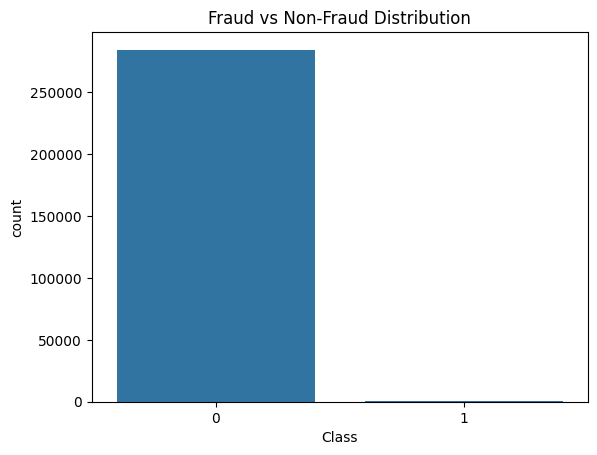

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=credit_data)
plt.title('Fraud vs Non-Fraud Distribution')
plt.show()


##  Class Distribution: Fraud vs Non-Fraud

###  Observation:
- The dataset is **extremely imbalanced**.
- `Class = 0` (Non-Fraud) dominates the data, with nearly **284,000** transactions.
- `Class = 1` (Fraud) contains only **492** transactions.

This means fraud cases represent **less than 0.2%** of all transactions.

---

### Why This Matters:
- Most machine learning models will be biased toward the majority class (non-fraud).
- Without correction, a model might achieve **99.8% accuracy** just by predicting “not fraud” every time, that’s useless for detection.

---

### Recommendation:
- Apply techniques to handle class imbalance:
  - **SMOTE** 
  - Use appropriate metrics: **F1-score**, **AUC-PR**, **confusion matrix**
  - Try **class weighting** if needed

This confirms the critical need for **careful modeling and evaluation** to detect fraud effectively.


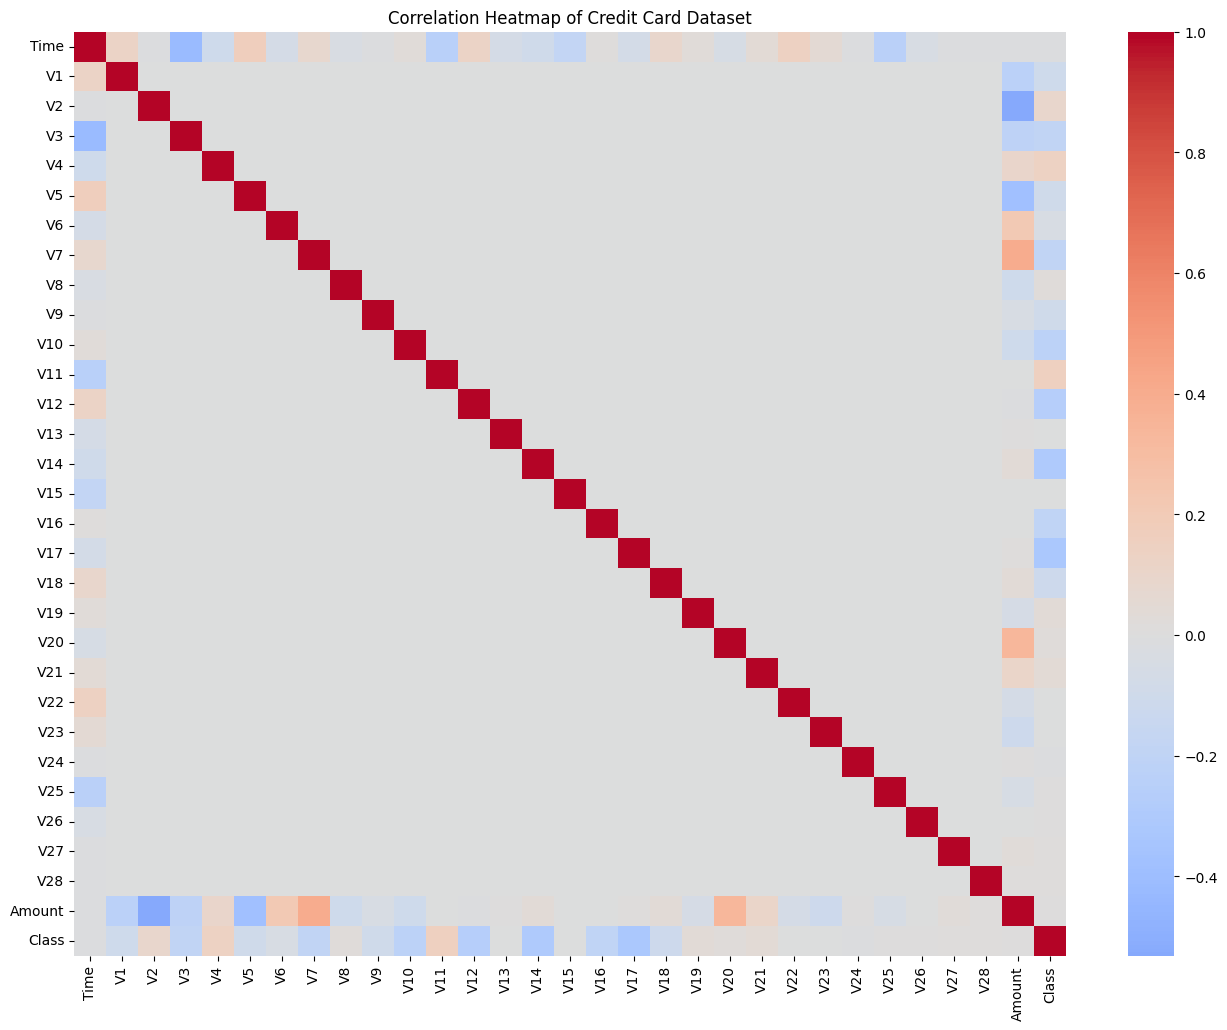

In [6]:
corr_matrix = credit_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Credit Card Dataset')
plt.show()


##  Correlation Heatmap: Credit Card Dataset

###  Observations:
- The features `V1` to `V28` are largely **uncorrelated with each other**, which is expected since they were created using **PCA** (Principal Component Analysis), which produces orthogonal (uncorrelated) components.
- Most of these PCA features also show **very low correlation with the target variable `Class`** (fraud or not).
- A few components (e.g., **V4**, **V10**, **V12**, **V14**, **V17**) show moderate negative or positive correlation with `Class`, hinting at their **importance in fraud detection**.
- `Amount` and `Time` show very little correlation with both `Class` and other features, they likely capture **independent transactional context**.


###  Interpretation:
- Even though the correlations are weak, some PCA components are still **important for model learning**  especially when used in combination.
- Tree-based models like **Random Forest** or **XGBoost** can still capture useful non-linear patterns.
- These insights help prioritize **feature interpretation (e.g., SHAP)** and may inform feature selection.


###  Recommendation:
- Track top 5–10 features most correlated with fraud (both positive and negative).
- Use them for:
  - Univariate distribution comparison (fraud vs non-fraud)
  - Feature importance visualization post-model training
